In [6]:
import pandas as pd
import scipy.io as sio
import os

# ANGEPASST für neue Struktur
current_directory = os.getcwd()
print(f"Arbeitsverzeichnis: {current_directory}")

# Pfad zu .mat-Datei in data/raw/
mat_db = sio.loadmat('data/raw/B0005.mat')['B0005']

Arbeitsverzeichnis: c:\Users\Zakar\lfp-battery-degradation\notebooks


FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/B0005.mat'

In [ ]:


def to_df(mat_db):
    """Returns one pd.DataFrame per cycle type"""

    # Features common for every cycle
    cycles_cols = ['type', 'ambient_temperature', 'time']

    # Features monitored during the cycle
    features_cols = {
        'charge': ['Voltage_measured', 'Current_measured', 'Temperature_measured', 
                'Current_charge', 'Voltage_charge', 'Time'],
        'discharge': ['Voltage_measured', 'Current_measured', 'Temperature_measured', 
                    'Current_charge', 'Voltage_charge', 'Time', 'Capacity'],
        'impedance': ['Sense_current', 'Battery_current', 'Current_ratio',
                    'Battery_impedance', 'Rectified_impedance', 'Re', 'Rct']
    }

    # Define one pd.DataFrame per cycle type
    df = {key: pd.DataFrame() for key in features_cols.keys()}

    # Get every cycle
    print(f'Number of cycles: {mat_db[0][0][0].shape[1]}')
    cycles = [[row.flat[0] for row in line] for line in mat_db[0][0][0][0]]

    # Get measures for every cycle
    for cycle_id, cycle_data in enumerate(cycles):
        tmp = pd.DataFrame()

        # Data series for every cycle
        features_x_cycle = cycle_data[-1]

        # Get features for the specific cycle type
        features = features_cols[cycle_data[0]]
        
        for feature, data in zip(features, features_x_cycle):
            if len(data[0]) > 1:
                # Correct number of records
                tmp[feature] = data[0]
            else:
                # Single value, so assign it to all rows
                tmp[feature] = data[0][0]
        
        # Add columns common to the cycle measurements
        tmp['id_cycle'] = cycle_id
        for k, col in enumerate(cycles_cols):
            tmp[col] = cycle_data[k]
        
        # Append cycle data to the right pd.DataFrame
        cycle_type = cycle_data[0]
        df[cycle_type] = pd.concat([df[cycle_type], tmp], ignore_index=True)
    
    return df
     

dfs = to_df(mat_db)

df1 = pd.DataFrame(dfs['charge'])
df2 = pd.DataFrame(dfs['discharge'])
df3 = pd.DataFrame(dfs['impedance'])

with pd.ExcelWriter('data/processed/B0005.xlsx') as writer:

    df1.to_excel(writer, sheet_name="charge")  

    df2.to_excel(writer, sheet_name="discharge")

    df3.to_excel(writer, sheet_name="impedance")


    

Number of cycles: 616


In [1]:
pip install pandas scipy matplotlib numpy jupyter ipykernel openpyxl

  Using cached pandas-2.3.1-cp39-cp39-win_amd64.whl (11.4 MB)
  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl (46.2 MB)
  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl (7.8 MB)
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl (15.9 MB)
  Using cached jupyter-1.1.1-py2.py3-none-any.whl (2.7 kB)
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl (55 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl (211 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
  Using cached fonttools-4.59.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached pillow-11.3.0-cp39-cp39-win_amd64.whl (7.0 MB)
  Using cached jupyter_console-6.6.3-py3-none-any.whl (24 kB)
  Using cached ipywi

You should consider upgrading via the 'c:\Users\Zakar\lfp-battery-degradation\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [23]:
df1.head()

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,id_cycle,type,ambient_temperature,time
0,3.873017,-0.001201,24.655358,0.000,0.003,0.000,0,charge,24,2008.0
1,3.479394,-4.030268,24.666480,-4.036,1.570,2.532,0,charge,24,2008.0
2,4.000588,1.512731,24.675394,1.500,4.726,5.500,0,charge,24,2008.0
3,4.012395,1.509063,24.693865,1.500,4.742,8.344,0,charge,24,2008.0
4,4.019708,1.511318,24.705069,1.500,4.753,11.125,0,charge,24,2008.0


In [18]:
df2.head()

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,Capacity,id_cycle,type,ambient_temperature,time
0,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.856487,1,discharge,24,2008.0
1,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.856487,1,discharge,24,2008.0
2,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.856487,1,discharge,24,2008.0
3,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.856487,1,discharge,24,2008.0
4,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1.856487,1,discharge,24,2008.0


In [19]:
df3.head()

,Sense_current,Battery_current,Current_ratio,Battery_impedance,Rectified_impedance,Re,Rct,id_cycle,type,ambient_temperature,time
0,-1.000000+ 1.000000j,-1.000000+ 1.000000j,1.000000+0.000000j,-0.438926-0.107298j,0.070069-0.000480j,0.044669,0.069456,40,impedance,24,2008.0
1,820.609497- 36.234550j,337.091461- 82.920776j,2.320415+0.463305j,-0.438926-0.107298j,0.070069-0.000480j,0.044669,0.069456,40,impedance,24,2008.0
2,827.242188- 48.231228j,330.631561- 70.013718j,2.424193+0.367465j,-0.438926-0.107298j,0.070069-0.000480j,0.044669,0.069456,40,impedance,24,2008.0
3,827.193481- 56.195717j,330.808624- 61.734425j,2.447002+0.286778j,-0.438926-0.107298j,0.070069-0.000480j,0.044669,0.069456,40,impedance,24,2008.0
4,824.929504- 53.241478j,332.682678- 57.629013j,2.434305+0.261646j,-0.438926-0.107298j,0.070069-0.000480j,0.044669,0.069456,40,impedance,24,2008.0


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541173 entries, 0 to 541172
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Voltage_measured      541173 non-null  float64
 1   Current_measured      541173 non-null  float64
 2   Temperature_measured  541173 non-null  float64
 3   Current_charge        541173 non-null  float64
 4   Voltage_charge        541173 non-null  float64
 5   Time                  541173 non-null  float64
 6   id_cycle              541173 non-null  int64  
 7   type                  541173 non-null  object 
 8   ambient_temperature   541173 non-null  uint8  
 9   time                  541173 non-null  float64
dtypes: float64(7), int64(1), object(1), uint8(1)
memory usage: 37.7+ MB


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50285 entries, 0 to 50284
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Voltage_measured      50285 non-null  float64
 1   Current_measured      50285 non-null  float64
 2   Temperature_measured  50285 non-null  float64
 3   Current_charge        50285 non-null  float64
 4   Voltage_charge        50285 non-null  float64
 5   Time                  50285 non-null  float64
 6   Capacity              50285 non-null  float64
 7   id_cycle              50285 non-null  int64  
 8   type                  50285 non-null  object 
 9   ambient_temperature   50285 non-null  uint8  
 10  time                  50285 non-null  float64
dtypes: float64(8), int64(1), object(1), uint8(1)
memory usage: 3.9+ MB


In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13344 entries, 0 to 13343
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype     
---  ------               --------------  -----     
 0   Sense_current        13344 non-null  complex128
 1   Battery_current      13344 non-null  complex128
 2   Current_ratio        13344 non-null  complex128
 3   Battery_impedance    13344 non-null  complex128
 4   Rectified_impedance  13344 non-null  complex128
 5   Re                   13344 non-null  float64   
 6   Rct                  13344 non-null  float64   
 7   id_cycle             13344 non-null  int64     
 8   type                 13344 non-null  object    
 9   ambient_temperature  13344 non-null  uint8     
 10  time                 13344 non-null  float64   
dtypes: complex128(5), float64(3), int64(1), object(1), uint8(1)
memory usage: 1.5+ MB


B0005 Degradationsanalyse
----------------------------------------
Zyklen analysiert: 168
Start-Kapazität: 1.856 Ah
End-Kapazität: 1.325 Ah
Gesamtdegradation: 28.6%


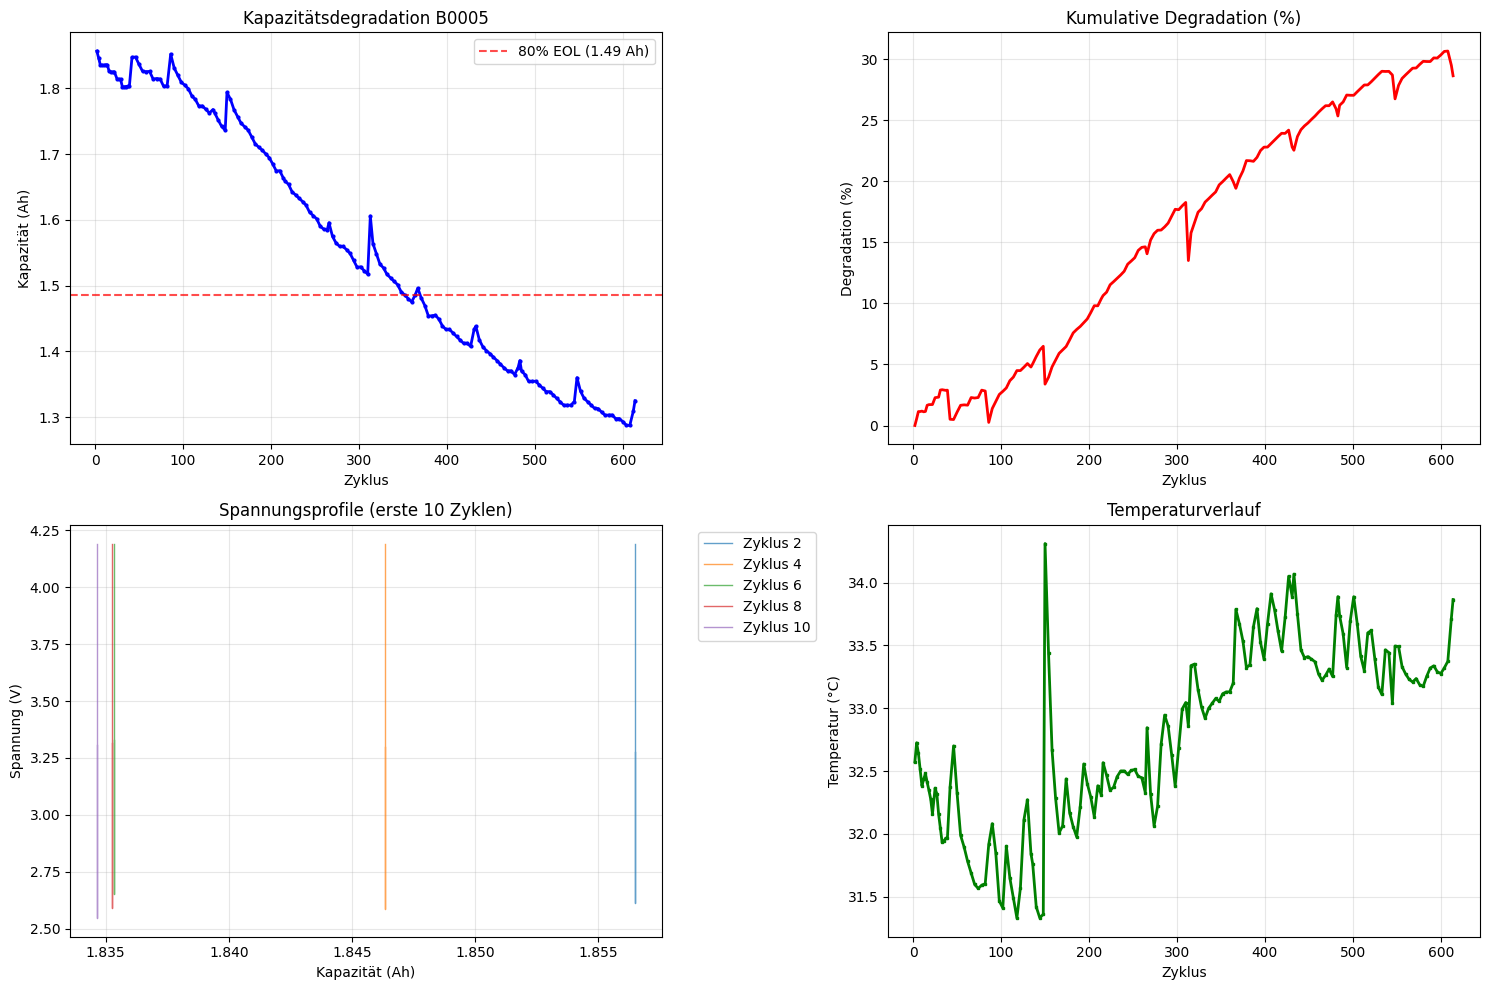


Transfer Learning Assessment:
Batterietyp: NASA B0005
Zyklen verfügbar: 168
Degradation: 28.6%
EOL erreicht: Ja
Status: Geeignet für Two-Stage Model Training


In [28]:
# NEUE ZELLE - Schnelle Degradationsanalyse für B0005
import matplotlib.pyplot as plt
import numpy as np

print("B0005 Degradationsanalyse")
print("-" * 40)

# Discharge-Daten für Degradationsanalyse nutzen
discharge_data = df2.copy()

# Kapazität pro Zyklus extrahieren
capacity_per_cycle = discharge_data.groupby('id_cycle')['Capacity'].last().reset_index()
capacity_per_cycle['cycle'] = capacity_per_cycle['id_cycle'] + 1

print(f"Zyklen analysiert: {len(capacity_per_cycle)}")
print(f"Start-Kapazität: {capacity_per_cycle['Capacity'].iloc[0]:.3f} Ah")
print(f"End-Kapazität: {capacity_per_cycle['Capacity'].iloc[-1]:.3f} Ah")

# Degradation berechnen
initial_capacity = capacity_per_cycle['Capacity'].iloc[0]
final_capacity = capacity_per_cycle['Capacity'].iloc[-1]
total_degradation = (initial_capacity - final_capacity) / initial_capacity * 100

print(f"Gesamtdegradation: {total_degradation:.1f}%")

# Visualisierung
plt.figure(figsize=(15, 10))

# Subplot 1: Kapazitätsdegradation
plt.subplot(2, 2, 1)
plt.plot(capacity_per_cycle['cycle'], capacity_per_cycle['Capacity'], 
         'b-', linewidth=2, marker='o', markersize=2)
plt.title('Kapazitätsdegradation B0005')
plt.xlabel('Zyklus')
plt.ylabel('Kapazität (Ah)')
plt.grid(True, alpha=0.3)

# 80% EOL-Linie
eol_capacity = initial_capacity * 0.8
plt.axhline(y=eol_capacity, color='r', linestyle='--', alpha=0.7, 
            label=f'80% EOL ({eol_capacity:.2f} Ah)')
plt.legend()

# Subplot 2: Degradationsrate
plt.subplot(2, 2, 2)
capacity_per_cycle['degradation_pct'] = (initial_capacity - capacity_per_cycle['Capacity']) / initial_capacity * 100
plt.plot(capacity_per_cycle['cycle'], capacity_per_cycle['degradation_pct'], 
         'r-', linewidth=2)
plt.title('Kumulative Degradation (%)')
plt.xlabel('Zyklus')
plt.ylabel('Degradation (%)')
plt.grid(True, alpha=0.3)

# Subplot 3: Spannungsprofil (erste 10 Zyklen)
plt.subplot(2, 2, 3)
for cycle in range(0, min(10, discharge_data['id_cycle'].max())):
    cycle_data = discharge_data[discharge_data['id_cycle'] == cycle]
    if len(cycle_data) > 0:
        plt.plot(cycle_data['Capacity'], cycle_data['Voltage_measured'], 
                alpha=0.7, linewidth=1, label=f'Zyklus {cycle+1}')

plt.title('Spannungsprofile (erste 10 Zyklen)')
plt.xlabel('Kapazität (Ah)')
plt.ylabel('Spannung (V)')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Subplot 4: Temperaturverlauf
plt.subplot(2, 2, 4)
temp_per_cycle = discharge_data.groupby('id_cycle')['Temperature_measured'].mean().reset_index()
temp_per_cycle['cycle'] = temp_per_cycle['id_cycle'] + 1

plt.plot(temp_per_cycle['cycle'], temp_per_cycle['Temperature_measured'], 
         'g-', linewidth=2, marker='s', markersize=2)
plt.title('Temperaturverlauf')
plt.xlabel('Zyklus')
plt.ylabel('Temperatur (°C)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Transfer Learning Potential
print("\nTransfer Learning Assessment:")
print(f"Batterietyp: NASA B0005")
print(f"Zyklen verfügbar: {len(capacity_per_cycle)}")
print(f"Degradation: {total_degradation:.1f}%")
print(f"EOL erreicht: {'Ja' if final_capacity <= eol_capacity else 'Nein'}")

if total_degradation > 15:
    print("Status: Geeignet für Two-Stage Model Training")
else:
    print("Status: Geeignet als Source Domain")

In [4]:
import urllib.request
import zipfile
import os

print("Überprüfe NASA Battery Dataset...")

# NASA Dataset URL
nasa_url = "https://phm-datasets.s3.amazonaws.com/NASA/5.+Battery+Data+Set.zip"
zip_filename = "nasa_battery_dataset.zip"

# Prüfen ob B0005.mat bereits existiert
if not os.path.exists('B0005.mat'):
    print("B0005.mat nicht gefunden. Lade NASA Dataset herunter...")
    
    # Download
    if not os.path.exists(zip_filename):
        print("   Downloading...")
        urllib.request.urlretrieve(nasa_url, zip_filename)
        print("Download komplett!")
    
    # Entpacken
    print("  Entpacke Dataset...")
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall(".")
    print("Entpackung komplett!")
    
else:
    print("✅ B0005.mat bereits vorhanden!")

# Verfügbare .mat-Dateien anzeigen
mat_files = [f for f in os.listdir('.') if f.endswith('.mat')]
print(f"Verfügbare .mat-Dateien: {mat_files}")

print("Bereit für bestehenden Code!")

Überprüfe NASA Battery Dataset...
B0005.mat nicht gefunden. Lade NASA Dataset herunter...
   Downloading...
Download komplett!
  Entpacke Dataset...
Entpackung komplett!
Verfügbare .mat-Dateien: []
Bereit für bestehenden Code!
